<a href="https://colab.research.google.com/github/DoCaoDuy/BaitapAI/blob/main/Prediction_of_rainfall_using_fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 25.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a59e6b2c2a6003b94d3b571c94292efa31520c4772ef892963d15d74ab697988
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


1.0573717528923816


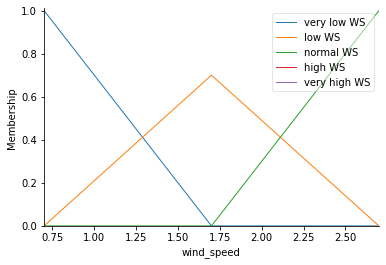

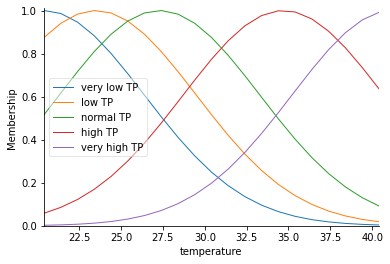

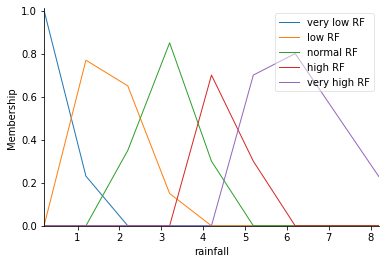

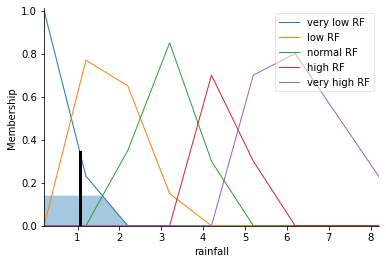

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind_speed = ctrl.Antecedent(np.arange(0.7,3.2,1),'wind_speed')
temperature = ctrl.Antecedent(np.arange(20.4,41.3,1),'temperature')

rainfall = ctrl.Consequent(np.arange(0.2,9.2,1),'rainfall')

wind_speed['very low WS'] = fuzz.trimf(wind_speed.universe,[0.7,0.7,1.4])
wind_speed['low WS'] = fuzz.trimf(wind_speed.universe,[0.7,1.4,2.4])
wind_speed['normal WS'] = fuzz.trimf(wind_speed.universe,[2.4,2.7,2.9])
wind_speed['high WS'] = fuzz.trimf(wind_speed.universe,[2.7,2.9,3])
wind_speed['very high WS'] = fuzz.trimf(wind_speed.universe,[2.9,3,3.1])

temperature['very low TP'] = fuzz.gaussmf(temperature.universe,20.4,6)
temperature['low TP'] = fuzz.gaussmf(temperature.universe,23.5,6)
temperature['normal TP'] = fuzz.gaussmf(temperature.universe,27.3,6)
temperature['high TP'] = fuzz.gaussmf(temperature.universe,34.7,6)
temperature['very high TP'] = fuzz.gaussmf(temperature.universe,41.2,6)

rainfall['very low RF'] = fuzz.trimf(rainfall.universe,[0.2,0.2,1.5])
rainfall['low RF'] = fuzz.trimf(rainfall.universe,[0.2,1.5,3.5])
rainfall['normal RF'] = fuzz.trimf(rainfall.universe,[1.5,3.5,4.5])
rainfall['high RF'] = fuzz.trimf(rainfall.universe,[3.5,4.5,5.5])
rainfall['very high RF'] = fuzz.trimf(rainfall.universe,[4.5,5.5,9])

wind_speed.view()
temperature.view()
rainfall.view()

rule1 = ctrl.Rule(wind_speed['very low WS']&temperature['very low TP'],rainfall['very low RF'])
rule2 = ctrl.Rule(wind_speed['low WS']&temperature['low TP'],rainfall['very low RF'])
rule3 = ctrl.Rule(wind_speed['very high WS']&temperature['very high TP'],rainfall['very high RF'])
rule4 = ctrl.Rule(wind_speed['high WS']&temperature['very high TP'],rainfall['high RF'])
rule5 = ctrl.Rule(wind_speed['very high WS']&temperature['normal TP'],rainfall['high RF'])
#Cho may hoc
rainfall_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
rainfalling = ctrl.ControlSystemSimulation(rainfall_ctrl)

rainfalling.input['wind_speed']=2.5
rainfalling.input['temperature']=26
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim=rainfalling)